In [1]:
from IPython.display import Image

# Hello Transformers

En 2017, investigadores de Google presentaron la arquitectura Transformer, superando a las RNNs en traducción automática.
En paralelo, ULMFiT demostró la eficacia del transfer learning con LSTMs para clasificación de texto.
Estos avances llevaron a GPT y BERT, transformers que combinan la arquitectura Transformer con aprendizaje no supervisado, 
estableciendo nuevos estándares en NLP. Desde entonces, han surgido numerosos modelos transformer.


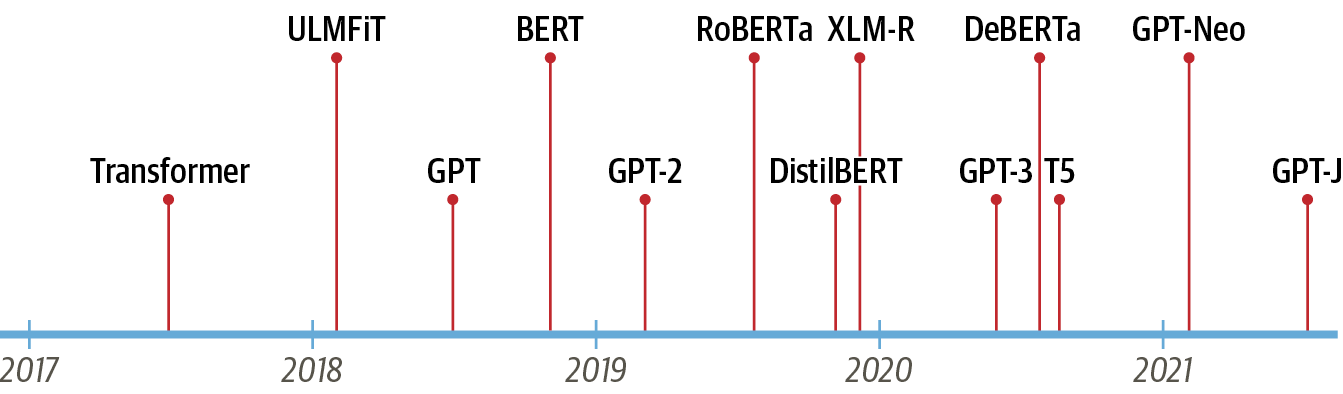

In [2]:
Image('images/chapter01_timeline.png', width=700)

Para comprender la novedad de los transformers, se explicarán:
- El framework encoder-decoder
- Mecanismos de atención
- Transfer learning


## The Encoder-Decoder Framework

Antes de los transformers, las RNNs, como las LSTMs, eran el estado del arte en NLP.
Las RNNs procesan datos secuenciales utilizando un bucle de retroalimentación para propagar información.
Reciben una entrada, la procesan y generan un estado oculto, que se utiliza en el siguiente paso temporal.

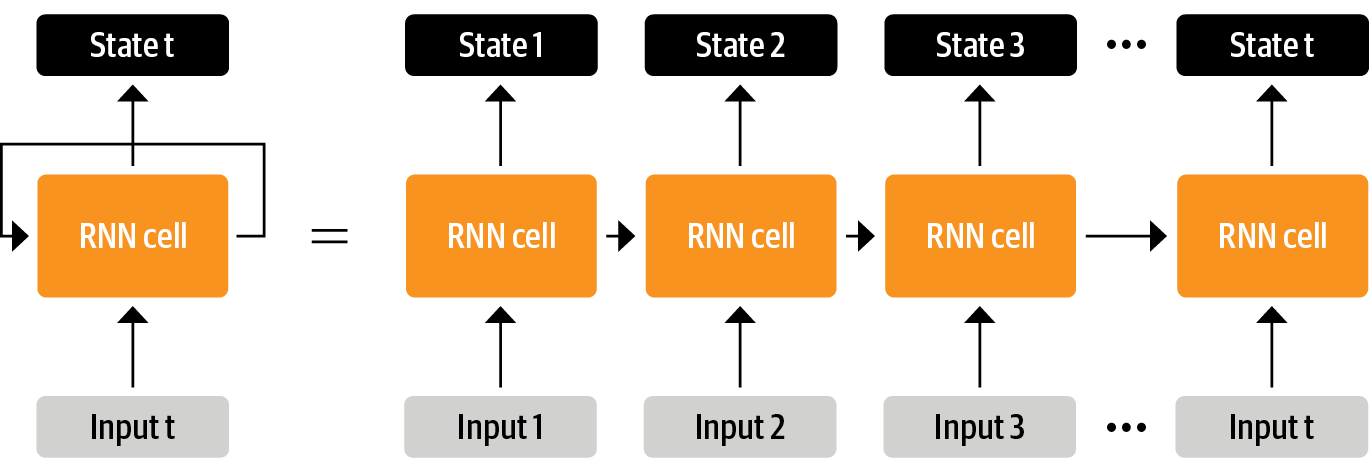

In [3]:

Image('images/chapter01_rnn.png', width=700)


Las RNNs fueron cruciales en el desarrollo de sistemas de traducción automática.
La arquitectura encoder-decoder, adecuada para secuencias de entrada y salida de longitud variable, se utiliza comúnmente.
El encoder codifica la información de la secuencia de entrada en un estado oculto, que se pasa al decoder para generar la salida.

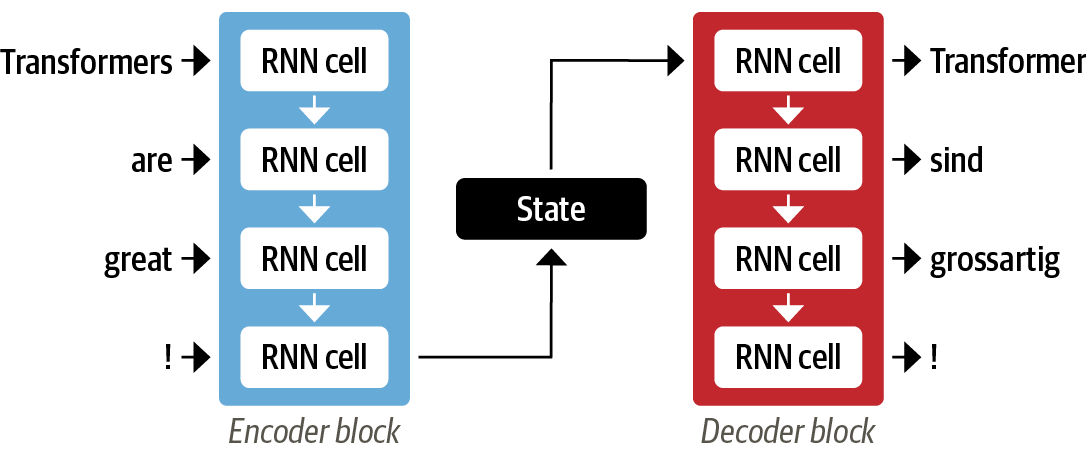

In [4]:

Image('images/chapter01_enc-dec.png', width=700)


Una limitación de esta arquitectura es el cuello de botella de información creado por el estado oculto final del encoder.
Para abordar esto, se introdujo el mecanismo de atención.

## Mecanismo de Atención

La atención permite al decoder acceder a todos los estados ocultos del encoder, asignando pesos a cada uno en cada paso de tiempo.
Esto permite al modelo enfocarse en los tokens de entrada más relevantes al generar la salida.

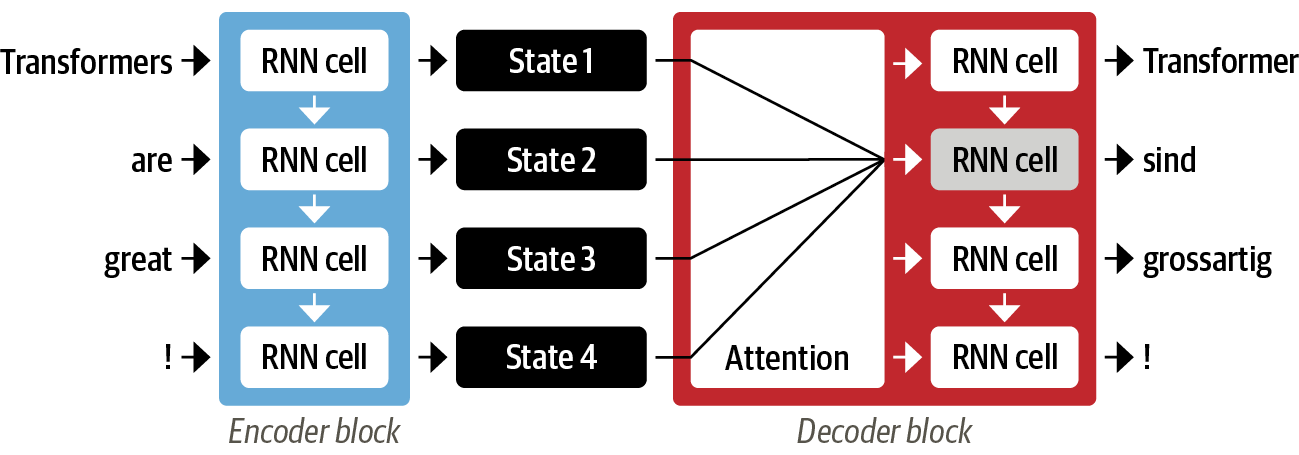

In [5]:

Image("images/chapter01_enc-dec-attn.png", width=700)


Los modelos basados en atención pueden aprender alineaciones complejas entre palabras en diferentes idiomas

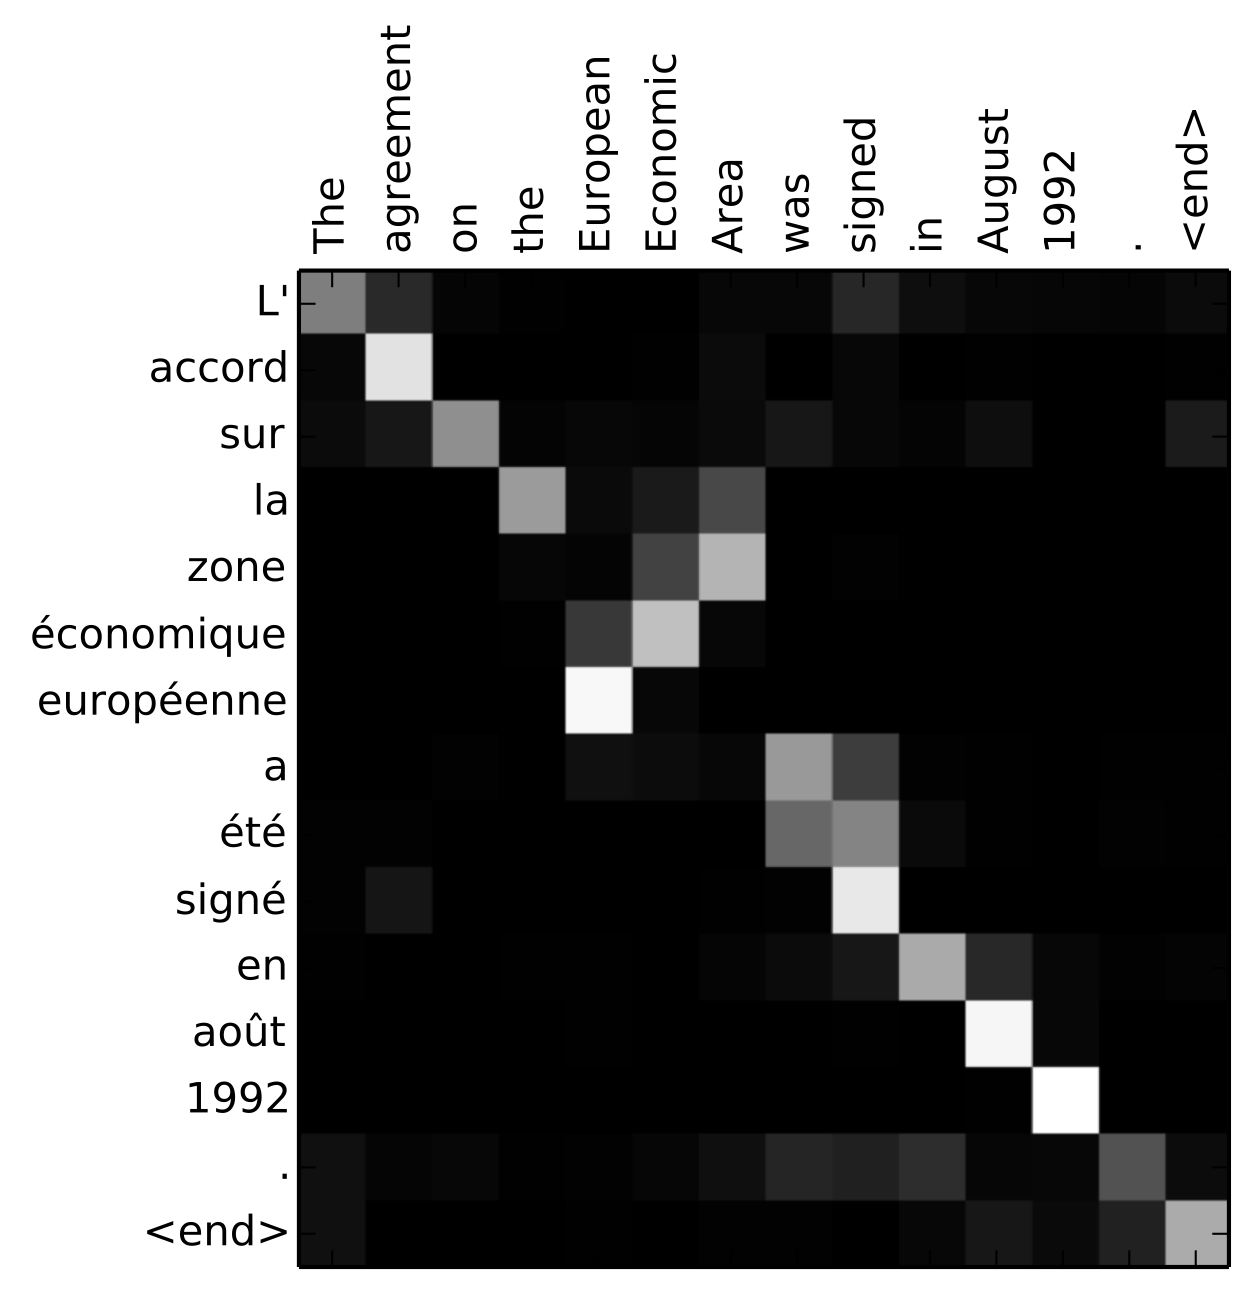

In [6]:

Image("images/chapter02_attention-alignment.png", width=400)


Aunque la atención mejoró las traducciones, las RNNs seguían siendo secuenciales y no paralelizables.
Los transformers introdujeron un nuevo paradigma: la autoatención.

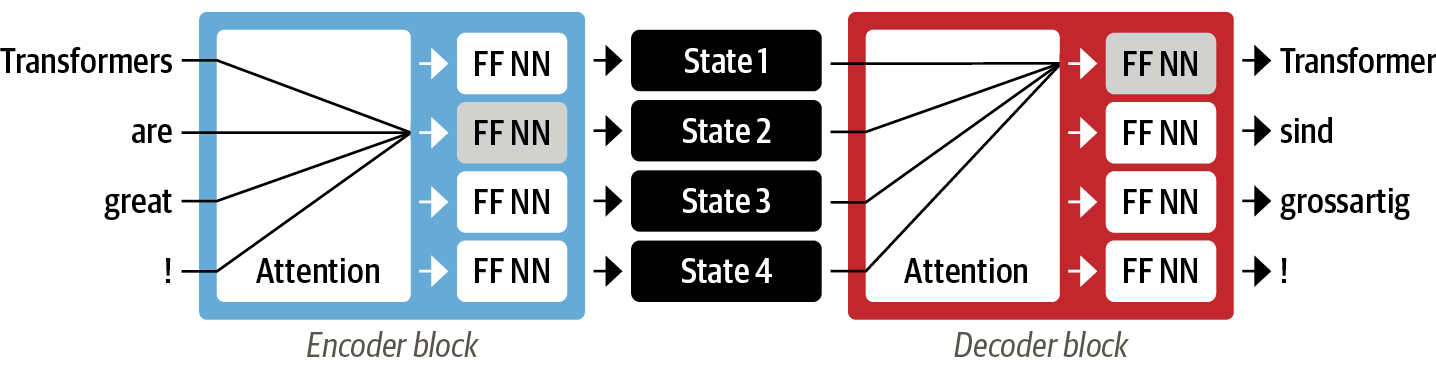

In [7]:

Image("images/chapter01_self-attention.png", width=700)


La autoatención permite que la atención opere en todos los estados de la misma capa, lo que permite un entrenamiento más rápido.
El transfer learning fue la pieza final para el éxito de los transformers.

## Transfer Learning in NLP

El transfer learning, común en visión por computadora, implica entrenar un modelo en una tarea y adaptarlo a otra.
Esto permite aprovechar el conocimiento aprendido de la tarea original.

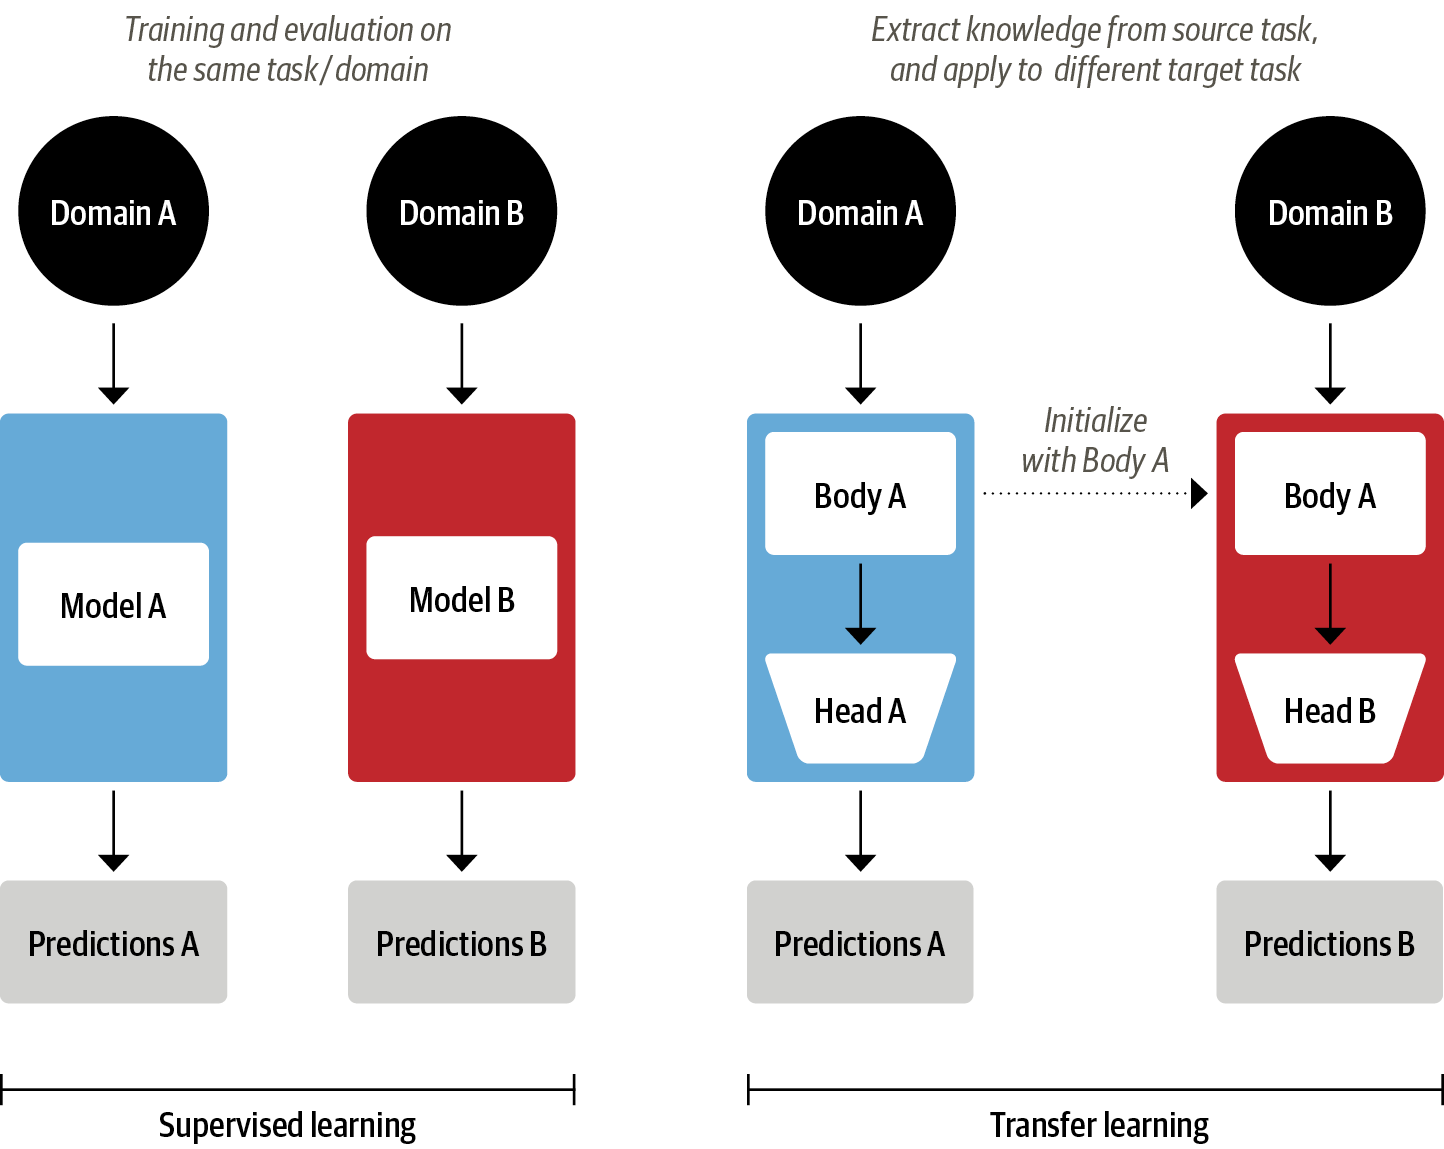

In [8]:

Image("images/chapter01_transfer-learning.png", width=600)


En NLP, ULMFiT introdujo un marco para adaptar modelos LSTM preentrenados:
- Preentrenamiento: el modelo aprende a predecir la siguiente palabra en un corpus grande.
- Adaptación de dominio: el modelo se adapta a un corpus específico del dominio.
- Finetuning: el modelo se ajusta para la tarea objetivo.

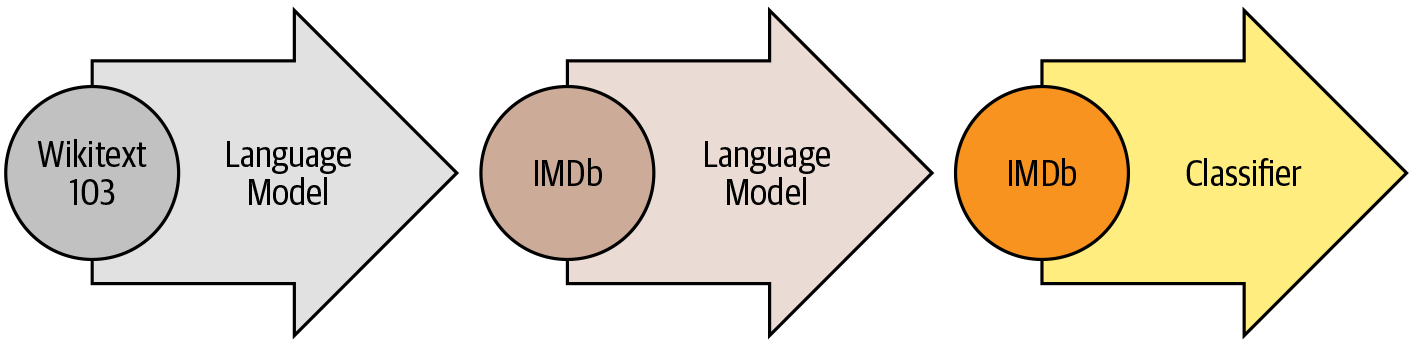

In [9]:

Image("images/chapter01_ulmfit.png", width=500)


ULMFiT allanó el camino para GPT y BERT, transformers que combinan autoatención y transfer learning.
- GPT utiliza el decoder del Transformer y el modelado de lenguaje.
- BERT utiliza el encoder del Transformer y el modelado de lenguaje enmascarado.

GPT y BERT establecieron nuevos estados del arte en NLP, marcando el comienzo de la era de los transformers.

## Hugging Face Transformers: Acortando la Brecha

Hugging Face Transformers proporciona una interfaz estandarizada para modelos transformer, simplificando su uso.
Ofrece:
- Implementaciones de modelos en PyTorch, TensorFlow y JAX.
- Pesos preentrenados.
- Cabezales específicos de la tarea para el ajuste fino.

Esto facilita la integración de transformers en aplicaciones del mundo real.


## Un tour sobre aplicaciones de Transformer

Se explorarán varias aplicaciones de transformers utilizando la biblioteca Transformers.

In [ ]:

text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""


### Text Classification

El análisis de sentimientos es una tarea de clasificación de texto que predice el sentimiento de un texto.
Se puede utilizar un pipeline de clasificación de texto para predecir el sentimiento de la reseña del cliente.

In [ ]:

from transformers import pipeline

classifier = pipeline("text-classification")

import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)    


### Named Entity Recognition

El reconocimiento de entidades nombradas (NER) identifica y clasifica entidades nombradas en el texto.
Se puede utilizar un pipeline NER para extraer entidades nombradas de la reseña del cliente.

In [ ]:

ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)    


### Question Answering 

La respuesta a preguntas implica encontrar la respuesta a una pregunta en un contexto dado.
Se puede utilizar un pipeline de respuesta a preguntas para extraer información específica de la reseña del cliente.

In [ ]:

reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])    


### Summarization

El resumen de texto genera una versión abreviada de un texto largo, conservando la información esencial.
Se puede utilizar un pipeline de resumen para resumir la reseña del cliente.


In [ ]:

summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])


### Translation

La traducción traduce texto de un idioma a otro.
Se puede utilizar un pipeline de traducción para traducir la reseña del cliente a otro idioma.

In [ ]:

translator = pipeline("translation_en_to_de", 
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])


### Text Generation

La generación de texto produce texto coherente y relevante a partir de un prompt.
Se puede utilizar un pipeline de generación de texto para generar una respuesta de servicio al cliente.

In [ ]:

from transformers import set_seed
set_seed(42) 

generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])


## The Hugging Face Ecosystem

El ecosistema Hugging Face proporciona herramientas y recursos para acelerar los proyectos de NLP.
Consta de:
- El Hub: alberga modelos preentrenados, conjuntos de datos, scripts de métricas y más.
- Bibliotecas:
    - Transformers: proporciona una interfaz para modelos transformer.
    - Tokenizers: ofrece estrategias de tokenización.
    - Datasets: simplifica la carga y el procesamiento de conjuntos de datos.
    - Accelerate: facilita el entrenamiento de modelos en diferentes entornos.

In [10]:

Image(url="images/chapter01_hf-ecosystem.png", width=500)

### The Hugging Face Hub

El Hub alberga miles de modelos preentrenados, conjuntos de datos y scripts de métricas.
Permite a los usuarios:
- Descubrir y cargar modelos preentrenados.
- Acceder y utilizar conjuntos de datos.
- Reproducir resultados publicados.
- Compartir modelos y conjuntos de datos.

In [11]:

Image(url="images/chapter01_hub-overview.png", width=1000)


In [12]:

Image(url="images/chapter01_hub-model-card.png", width=1000)


### Hugging Face Tokenizers

Hugging Face Tokenizers proporciona estrategias de tokenización y maneja el preprocesamiento y postprocesamiento del texto.
Ofrece una interfaz fácil de usar para tokenizar texto y es compatible con varios modelos transformer.


### Hugging Face Datasets

Hugging Face Datasets simplifica la carga, el procesamiento y el almacenamiento de conjuntos de datos.
Proporciona:
- Una interfaz estándar para miles de conjuntos de datos.
- Almacenamiento en caché inteligente.
- Asignación de memoria para manejar conjuntos de datos grandes.
- Interoperabilidad con Pandas y NumPy.

### Hugging Face Accelerate

Hugging Face Accelerate simplifica el entrenamiento de modelos en diferentes entornos.
Abstrae la lógica específica de la infraestructura, lo que facilita el cambio entre diferentes configuraciones de entrenamiento.



## Conclusion

Este notebook proporcionó una introducción a los transformers, cubriendo su historia, arquitectura y aplicaciones.
También presentó el ecosistema Hugging Face, que proporciona herramientas y recursos para trabajar con transformers.
Los transformers han revolucionado el NLP y se han convertido en una herramienta esencial para cualquier profesional de NLP.